In [49]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

In [38]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [39]:
!mkdir data
trainset = datasets.MNIST('data', download=True, train=True, transform=transform)
valset = datasets.MNIST('data', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

A subdirectory or file data already exists.


In [40]:
class Standard(nn.Module):
    def __init__(self, in_dim, h1_dim, h2_dim, out_dim) -> None:
        super().__init__()
        self.flatten = nn.Flatten()
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax()
        
        self.l1 = nn.Linear(in_dim, h1_dim)
        self.l2 = nn.Linear(h1_dim, h2_dim)
        self.l3 = nn.Linear(h2_dim, out_dim)
        
    def forward(self, x):
        x = self.flatten(x)
        x = self.l1(x)
        x = self.relu(x)
        x = self.l2(x)
        x = self.relu(x)
        x = self.l3(x)
        x = self.softmax(x)
        
        return x
    
    
in_dim = 28*28
h1_dim = 100
h2_dim = 100
out_dim = len(trainset.classes)
model = Standard(in_dim, h1_dim, h2_dim, out_dim)

In [58]:
def score(y_pred, y_true):
    winners = y_pred.argmax(dim=1)
    return (winners == y_true).sum() / winners.size(0)

EPOCH	 1


<ipython-input-40-231b969a3cc4>:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


Train Loss:	 1.626151863827126
Train Accuracy	 0.84949696
Val Loss:	 1.548036527481808
Val Accuracy	 0.9165008
---------------------------
EPOCH	 2
Train Loss:	 1.5469965694555596
Train Accuracy	 0.9180104
Val Loss:	 1.5383984829969466
Val Accuracy	 0.9247612
---------------------------
EPOCH	 3
Train Loss:	 1.531025780924856
Train Accuracy	 0.9322028
Val Loss:	 1.5264451632833784
Val Accuracy	 0.9362062
---------------------------
EPOCH	 4
Train Loss:	 1.520643393876456
Train Accuracy	 0.9423807
Val Loss:	 1.517108210332834
Val Accuracy	 0.9440685
---------------------------
EPOCH	 5
Train Loss:	 1.5144575815210972
Train Accuracy	 0.94759464
Val Loss:	 1.5131859718614322
Val Accuracy	 0.94785035
---------------------------
EPOCH	 6
Train Loss:	 1.509570656173519
Train Accuracy	 0.9526919
Val Loss:	 1.5080976493799003
Val Accuracy	 0.95322454
---------------------------
EPOCH	 7
Train Loss:	 1.5057401197043054
Train Accuracy	 0.9560901
Val Loss:	 1.502642696070823
Val Accuracy	 0.95800

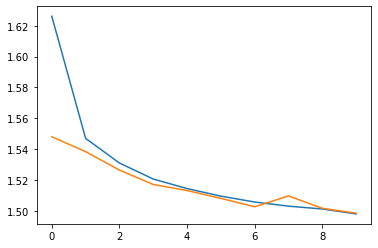

In [64]:
in_dim = 28*28
h1_dim = 100
h2_dim = 100
out_dim = len(trainset.classes)
model = Standard(in_dim, h1_dim, h2_dim, out_dim)


n_epochs = 10
learning_rate = 1e-3
loss_fn = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_losses = []
val_losses = []
train_acc = []
val_acc = []
for epoch in range(1, n_epochs + 1):
    print('EPOCH\t', epoch)
    batch_train_losses = []
    batch_val_losses = []
    batch_train_acc = []
    batch_val_acc = []
    
    for x_batch, y_batch in trainloader:
        y_onehot = nn.functional.one_hot(y_batch, num_classes=10).float()
        
        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_onehot)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        batch_train_losses.append(loss.item())
        batch_train_acc.append(score(y_pred, y_batch))
        
    train_losses.append(np.mean(batch_train_losses))
    train_acc.append(np.mean(batch_train_acc))
    
    print('Train Loss:\t', train_losses[-1])
    print('Train Accuracy\t', train_acc[-1])
        
    with torch.no_grad():
        for x_batch, y_batch in valloader:
            y_onehot = nn.functional.one_hot(y_batch, num_classes=10).float()
        
            y_pred = model(x_batch)
            loss = loss_fn(y_pred, y_onehot)
            
            batch_val_losses.append(loss.item())
            batch_val_acc.append(score(y_pred, y_batch))
        
        val_losses.append(np.mean(batch_val_losses))
        val_acc.append(np.mean(batch_val_acc))
        
    print('Val Loss:\t', val_losses[-1])
    print('Val Accuracy\t', val_acc[-1])
    print('---------------------------')

fig, ax = plt.subplots()
ax.plot(np.arange(epoch), train_losses)
ax.plot(np.arange(epoch), val_losses)
plt.show()

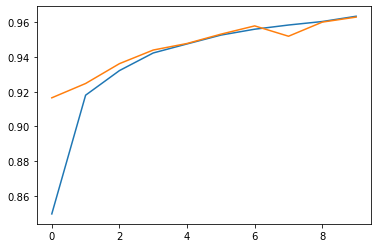

In [65]:
fig, ax = plt.subplots()
ax.plot(np.arange(epoch), train_acc)
ax.plot(np.arange(epoch), val_acc)
plt.show()

In [61]:
y_batch

tensor([3, 4, 0, 6, 4, 4, 7, 5, 9, 2, 5, 9, 8, 1, 1, 4])

In [63]:
model(x_batch).argmax(dim=1)

<ipython-input-40-231b969a3cc4>:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


tensor([3, 4, 0, 6, 4, 4, 7, 5, 9, 2, 5, 9, 8, 1, 1, 4])